# Proyek Analisis Data: Nama dataset
- Kelompok : 6
- Anggota : </br>
10123248 - Fariz Maulana</br>
10123228 - Yolanda Belva</br>
10123230 - Taura Farhatsari</br>
10123234 - Anisa</br>
10123254 - Naufal Mahdavickia

## Menentukan Pertanyaan Bisnis

- Contoh : Berapakah jumlah penduduk yang berpendidikan rendah yang ada di kota bandung - 10110001 - Asep Supena
- pertanyaan 2

## Menyiapkan semua library yang dibuthkan

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [10]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Display first few rows
day_df.head(), hour_df.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

In [17]:
print(day_df.info())
print(hour_df.info())

print(day_df.isnull().sum())
print(hour_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

In [20]:
# Step 1: Convert 'dteday' to datetime format
day_df['dteday'] = pd.to_datetime(day_df['dteday'], errors='coerce')
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], errors='coerce')

# Step 2: Recheck for missing values after conversion
day_missing_after_conversion = day_df.isnull().sum()
hour_missing_after_conversion = hour_df.isnull().sum()

# Collect summary after initial cleaning steps
day_cleaned_head = day_df.head()
hour_cleaned_head = hour_df.head()

day_missing_after_conversion, hour_missing_after_conversion, day_cleaned_head, hour_cleaned_head


(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
    instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1 2011-01-01       1   0     1        0        6           0   
 1        2 2011-01-02       1   0     1        0        0           0   
 2        3 2011-01-03       1   0     1        0        1           1   
 3        4 2011-01-04       1   0     1        0        2           1   
 4        5 2011-01-05       1   0     

## Exploratory Data Analysis (EDA)

## Penggunaan Sepeda Berdasarkan Musim

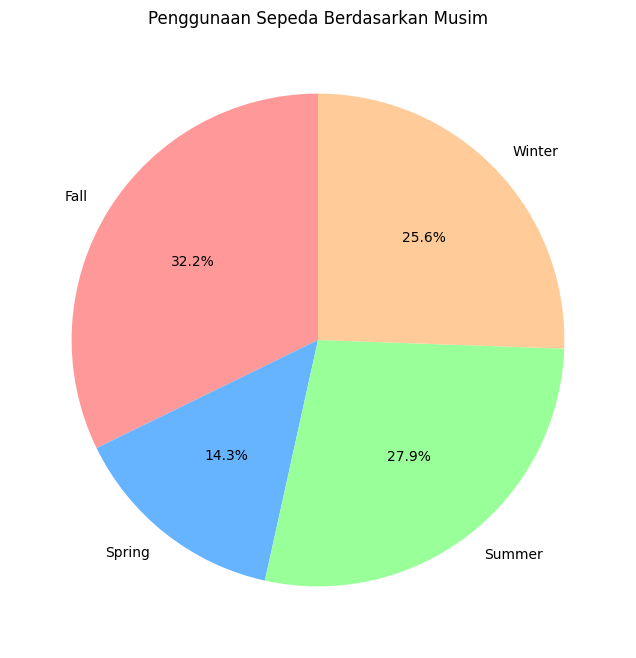

In [28]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_mapping)

usage_by_season = day_df.groupby('season_name')['cnt'].sum()

plt.figure(figsize=(8, 8))
usage_by_season.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Penggunaan Sepeda Berdasarkan Musim')
plt.ylabel('')
plt.show()

## Penyewaan Sepeda Berdasarkan Jam

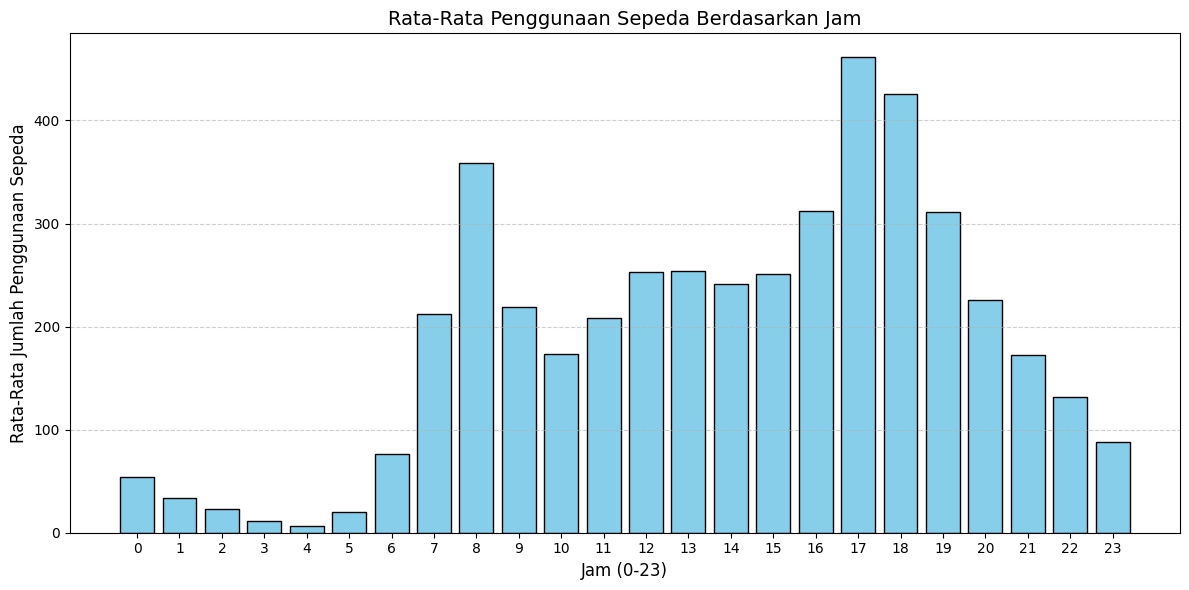

In [26]:
hourly_usage = hour_df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(hourly_usage['hr'], hourly_usage['cnt'], color='skyblue', edgecolor='black')

plt.title('Rata-Rata Penggunaan Sepeda Berdasarkan Jam', fontsize=14)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Rata-Rata Jumlah Penggunaan Sepeda', fontsize=12)
plt.xticks(hourly_usage['hr'])
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## Penyewaan Sepeda Berdasarkan Hari

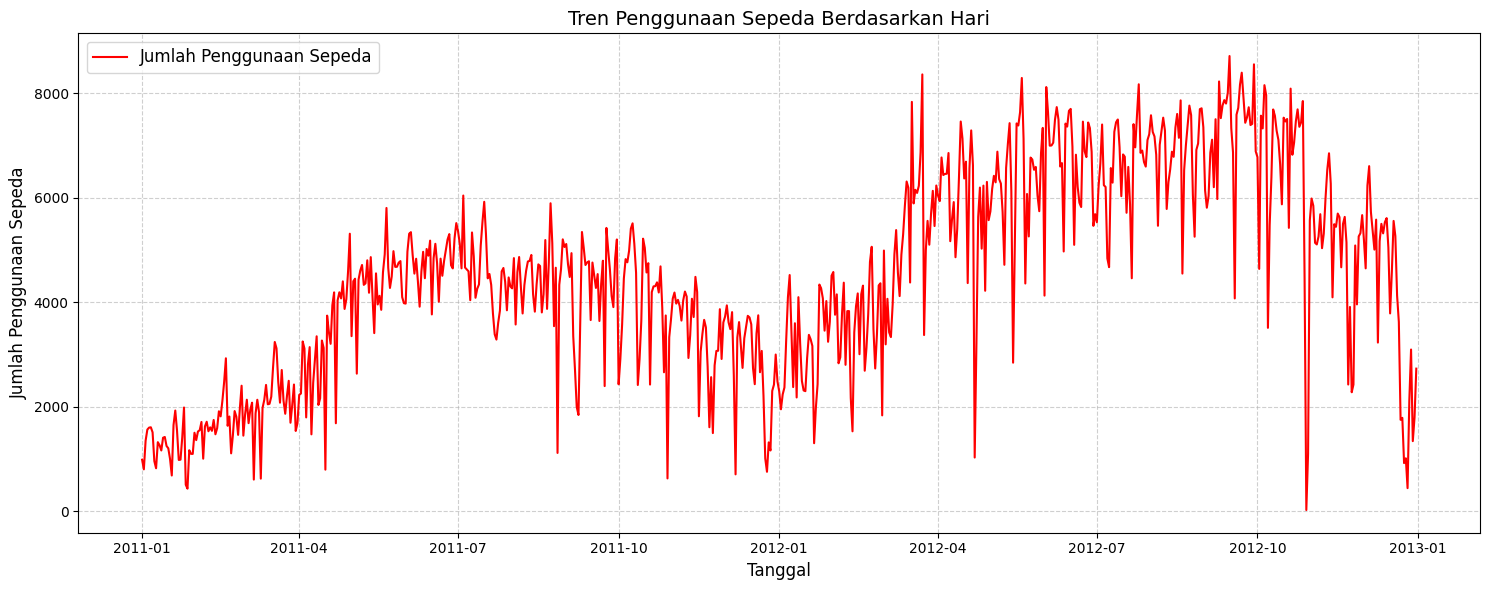

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(day_df['dteday'], day_df['cnt'], color='red', label='Jumlah Penggunaan Sepeda')

# Customize the plot
plt.title('Tren Penggunaan Sepeda Berdasarkan Hari', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Penggunaan Sepeda', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

## Visualization & Explanatory Analysis

### Di musim apa yang paling banyak rental sepeda dan paling rendah rental sepeda? - 10123228 - Yolanda Belva

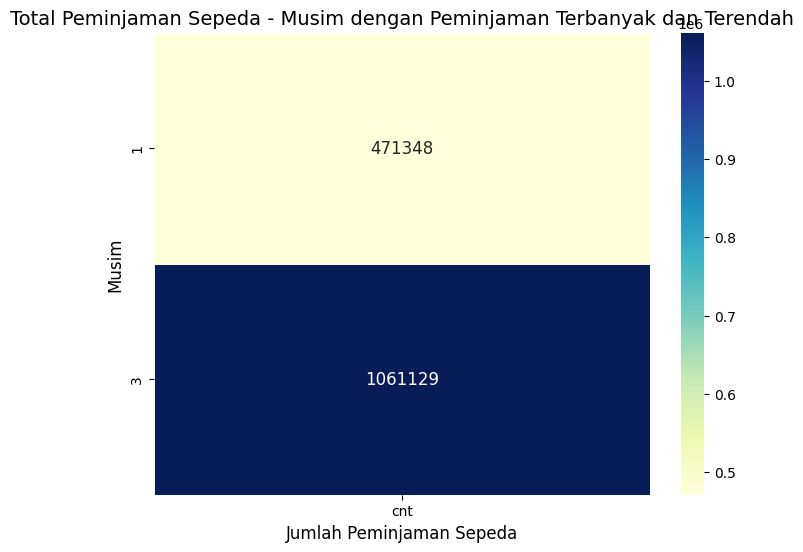

In [57]:
total_rentals_by_season = day_df.groupby('season')['cnt'].sum().reset_index()

max_season = total_rentals_by_season.loc[total_rentals_by_season['cnt'].idxmax()]
min_season = total_rentals_by_season.loc[total_rentals_by_season['cnt'].idxmin()]

filtered_data = total_rentals_by_season[total_rentals_by_season['season'].isin([max_season['season'], min_season['season']])]

heatmap_data = filtered_data.pivot_table(index='season', values='cnt', aggfunc='sum')

plt.figure(figsize=(8, 6))

sns.heatmap(
    heatmap_data, 
    annot=True,
    cmap='YlGnBu',
    cbar=True, 
    fmt='.0f', 
    linewidths=0.5,  
    annot_kws={'size': 12} 
)

plt.title('Total Peminjaman Sepeda - Musim dengan Peminjaman Terbanyak dan Terendah', fontsize=14)
plt.xlabel('Jumlah Peminjaman Sepeda', fontsize=12)
plt.ylabel('Musim', fontsize=12)

# Menampilkan plot
plt.show()


### Bagaimana distribusi peminjaman sepeda pada hari kerja dibandingkan hari libur (workingday vs. holiday)? - 10123248 - Fariz Maulana

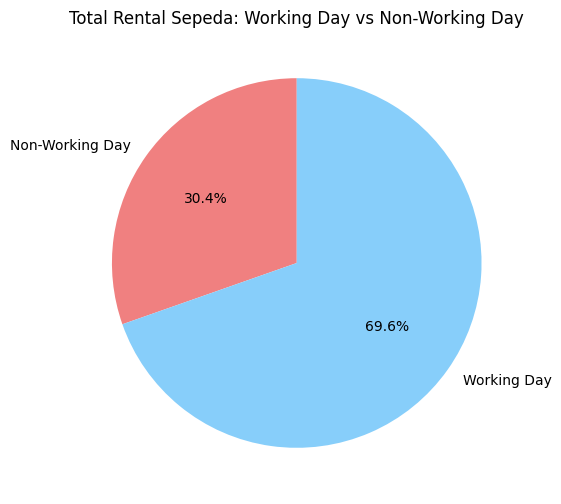

In [40]:
# Filter data by working day status and calculate total rentals
workingday_totals = day_df.groupby('workingday')['cnt'].sum()

# Labels for the pie chart
labels = ['Non-Working Day', 'Working Day']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    workingday_totals, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightcoral', 'lightskyblue']
)
plt.title('Total Rental Sepeda: Working Day vs Non-Working Day')
plt.show()

## Bagaimana pengaruh cuaca (weathersit) terhadap jumlah peminjaman sepeda? - 10123230 - Taura Farhatsari

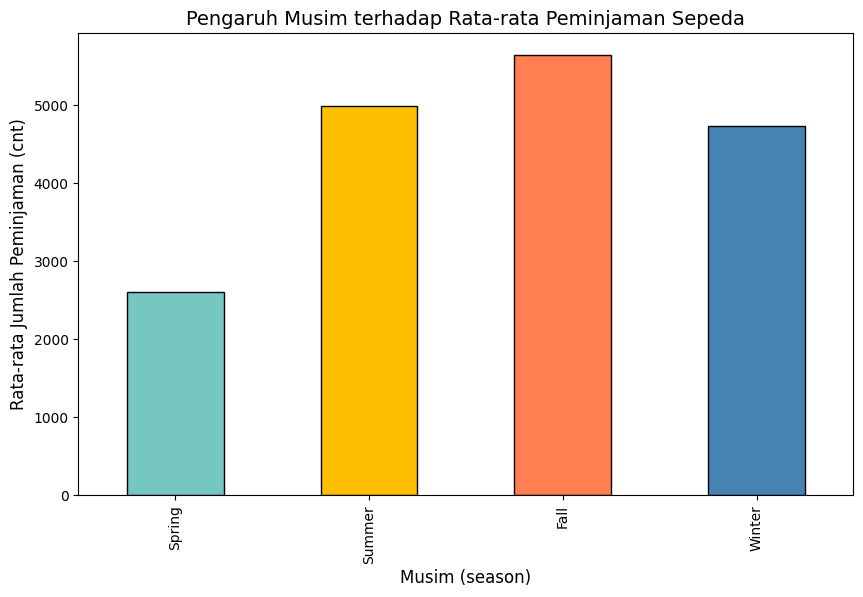

In [39]:

plt.figure(figsize=(10, 6))

avg_cnt_by_season = day_df.groupby('season')['cnt'].mean()
avg_cnt_by_season.plot(
    kind='bar',
    color=['#76c7c0', '#ffbf00', '#ff7f50', '#4682b4'],
    edgecolor='black'
)

plt.title('Pengaruh Musim terhadap Rata-rata Peminjaman Sepeda', fontsize=14)
plt.xlabel('Musim (season)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman (cnt)', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], fontsize=10)

plt.show()


## Apakah ada perbedaan tren peminjaman sepeda antara tahun 2011 dan tahun 2012? - 10123234 - Anisa

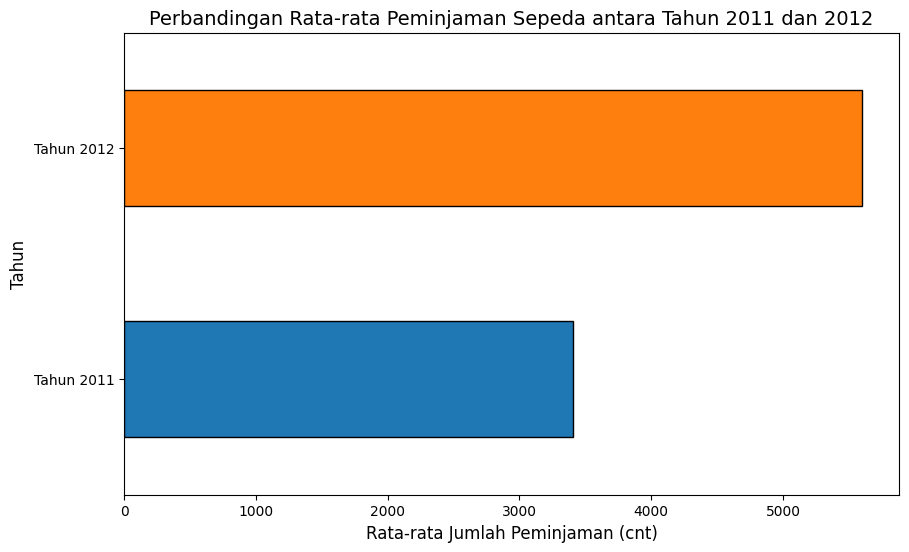

In [58]:
plt.figure(figsize=(10, 6))

avg_cnt_by_year = day_df.groupby('yr')['cnt'].mean()
avg_cnt_by_year.plot(
    kind='barh',
    color=['#1f77b4', '#ff7f0e'],
    edgecolor='black'
)

plt.title('Perbandingan Rata-rata Peminjaman Sepeda antara Tahun 2011 dan 2012', fontsize=14)
plt.xlabel('Rata-rata Jumlah Peminjaman (cnt)', fontsize=12)
plt.ylabel('Tahun', fontsize=12)
plt.yticks(ticks=[0, 1], labels=['Tahun 2011', 'Tahun 2012'], fontsize=10)

plt.show()


## Bagaimana hubungan antara cuaca (weathersit) dan jenis pengguna (casual vs registered)? - 10123254 - Naufal Mahdavickia

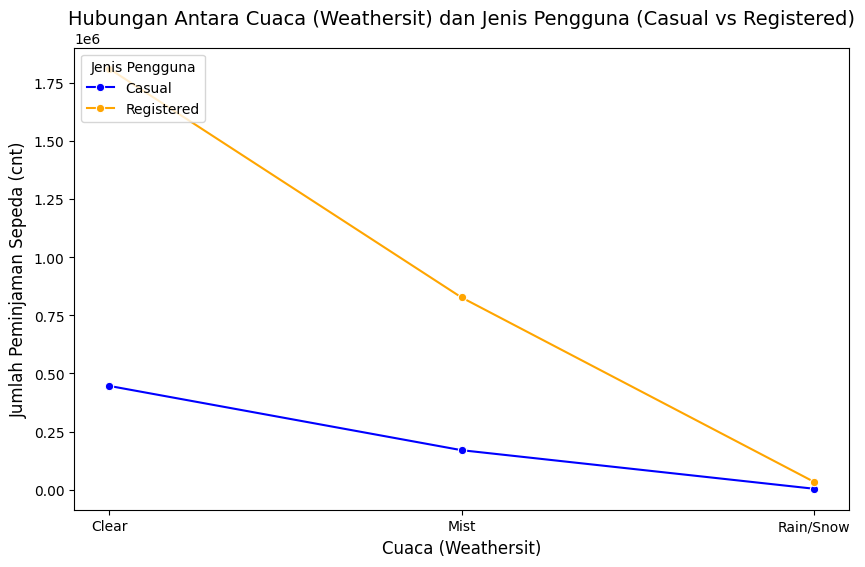

In [62]:
grouped_data = day_df.groupby(['weathersit'])[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=grouped_data, x='weathersit', y='casual', label='Casual', marker='o', color='blue')

sns.lineplot(data=grouped_data, x='weathersit', y='registered', label='Registered', marker='o', color='orange')

plt.title('Hubungan Antara Cuaca (Weathersit) dan Jenis Pengguna (Casual vs Registered)', fontsize=14)
plt.xlabel('Cuaca (Weathersit)', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)', fontsize=12)

plt.xticks(ticks=[1, 2, 3], labels=['Clear', 'Mist', 'Rain/Snow'], fontsize=10)

plt.legend(title='Jenis Pengguna', loc='upper left')

plt.show()


## Conclusion

- Conclution Pertanyaan Yolanda Belva-10123228

Berdasarkan hasil Heatmap

Musim dengan Peminjaman Sepeda Terbanyak:
Musim dengan jumlah peminjaman sepeda terbanyak adalah musim Musim Gugur (Fall). Hal ini mungkin karena suhu yang lebih hangat di musim panas mendorong lebih banyak orang untuk bersepeda, baik untuk kebutuhan transportasi maupun untuk rekreasi.

Musim dengan Peminjaman Sepeda Tersedikit:
Musim dengan jumlah peminjaman sepeda terendah adalah Musim Semi (Spring). Cuaca cenderung lebih tidak stabil, dengan banyak peralihan antara hujan, angin, dan suhu yang lebih sejuk. Hal ini bisa membuat orang lebih memilih menggunakan transportasi lain yang lebih nyaman daripada sepeda.

- Conclution Pertanyaan Fariz Maulana-10123248

Berdasarkan hasil Pie Chart

Jika peminjaman lebih tinggi pada hari kerja : Ini menunjukkan penggunaan sepeda lebih banyak untuk  transportasi sehari-hari.

Jika peminjaman lebih tinggi pada hari libur: Ini mungkin menunjukkan bahwa orang menggunakan sepeda lebih untuk rekreasi atau olahraga saat liburan.

Dan berdasarkan pie chart maka kesimpulannya adalah orang-orang lebih banyak meminjam pada hari kerja untuk transportasi sehari hari

Pie chart membantu kita memahami distribusi peminjaman berdasarkan jenis hari (kerja vs. libur).

- Conclution Pertanyaan Taura Farhatsari-10123230

Berdasarkan hasil Vertical Bar Chart

Rata-rata peminjaman sepeda dengan jumlah tertinggi terjadi pada musim panas (Summer) dan musim gugur (Fall). Sedangkan peminjaman dengan jumlah terendah terjadi pada musim semi (Spring) dan musim dingin (Winter). Hal ini menunjukkan bahwa cuaca hangat dan cerah lebih mendukung aktivitas bersepeda dibandingkan cuaca dingin.

- Conclution Pertanyaan Anisa-10123234

Berdasarkan hasil Horizontal Bar Chart

Rata-rata peminjaman sepeda per hari pada tahun 2011 adalah sekitar 3,406 sepeda, sedangkan pada tahun 2012 meningkat menjadi 5,600 sepeda. Hal ini menunjukkan adanya peningkatan sebesar hampir 64% dari tahun 2011 ke tahun 2012 yang menunjukkan adanya tren peningkatan popularitas atau penggunaan layanan sepeda selama periode tersebut. Tren ini mencerminkan pergeseran positif dalam penggunaan sepeda sebagai moda transportasi.

- Conclution Pertanyaan Naufal Mahdavickia-10123254

Berdasarkan hasil Line Chart

Pengguna Casual:
Peminjaman sepeda oleh pengguna casual paling tinggi saat cuaca cerah (Clear).
Terjadi penurunan signifikan pada kondisi cuaca berkabut (Mist) dan semakin rendah saat hujan/salju (Rain/Snow).

Pengguna Registered:
Peminjaman oleh pengguna registered tetap tinggi pada cuaca cerah dan berkabut, tetapi menurun saat hujan/salju.
Penurunan pada pengguna registered lebih kecil dibandingkan pengguna casual dalam kondisi cuaca buruk.